In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import os
import seaborn as sns

In [2]:
plt.style.use(['science', 'retro'])

mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'DejaVu Sans'
mpl.rcParams['mathtext.it'] = 'DejaVu Sans:italic'
mpl.rcParams['mathtext.bf'] = 'DejaVu Sans:bold'

plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = "DejaVu Sans"

plt.rc('text', usetex=True)
plt.rcParams['axes.linewidth'] = 1.2
mpl.rcParams['lines.linewidth'] = 1.6

In [3]:
src = "Deuteron/data/"

In [52]:
df = pd.read_csv("deuteron_all_data.csv")
df_exp = pd.read_csv("deuteron_all_exp.csv")

In [86]:
df_exp[df_exp.energy == 100].fname.unique()

array(['Exp100_2.dat', 'Exp100n.dat', 'Exp100.dat', 'Exp100_3.dat'],
      dtype=object)

In [6]:
observables = [ob for ob in df.columns.values if ob not in ["THCM", "angle", "CUTOFF", "FORCE"]]

In [7]:
print(observables)

['CROSS', 'CROSS2', 'P1', 'P2', 'PHIP', 'WAVE', 'T11D', 'T20D', 'T21D', 'T22D', 'T11D2', 'T20D2', 'T21D2', 'T22D2', 'AX', 'AY', 'AZ', 'AX2', 'AY2', 'AZ2', 'POLNOUT(y)', 'POLNOUT2(y)', 'CROSSCAP', 'CROSSCAP2', 'AYN1CAP', 'AYN1CAP2', 'Energy']


In [7]:
FORCES=["LO", "NLO", "N2LO", "N3LO", "N4LO", "N4LO+"]
CUTOFF=[400,450,500,550]

In [8]:
line_styles = {"LO": {"marker":"d", "markevery": 10, "markersize": 3, "color": "tab:orange"},
               "NLO": {"marker":".", "markevery": 10, "color": "tab:blue"},
               "N2LO": {"ls":  (0, (5, 3)), "color": "tab:green"},
               "N3LO": {"ls": "dotted", "color": "tab:red"},
               "N4LO": {"color": "black"},
               "N4LO+": {"ls": (0, (5, 2, 0.8, 2, 0.8, 2)), "color": "tab:cyan"},
               "AV18": {"ls": (0, (5, 2, 1.3, 2,)), "color": "tab:pink"}
              }
ls_cutoff = {400: line_styles["N4LO"],
             450: line_styles["N4LO+"],
             500: line_styles["N2LO"],
             550: line_styles["N3LO"], 
            }

In [9]:
markers = ["o", "s", "^", "x"]

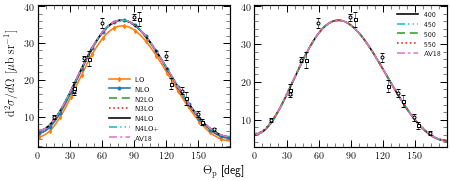

In [183]:
obs="CROSS2"
ylabel="$\mathrm{d}^2\sigma / d \Omega ~[\mu\mathrm{b~sr}^{-1}]$"
energy=30

fig, axes = plt.subplots(1,2, figsize=(6.5, 2.8))
fig.supxlabel("$\Theta_\mathrm{p}$ [deg]", y=0.08, size=12)
fig.supylabel(ylabel, x=0.03, y=0.6, size=12)
for force in FORCES:
    df_tmp = df[(df.FORCE == force) & (df.CUTOFF == 450) & (df.Energy == energy) & (df.WAVE == "SIEGERT")]
    axes[0].plot(df_tmp.angle, df_tmp[obs],
                 **line_styles[force], label = force)
for cutoff in CUTOFF:
    df_tmp = df[(df.FORCE == "N4LO+") & (df.CUTOFF == cutoff) & (df.Energy == energy) & (df.WAVE == "SIEGERT")]
    axes[1].plot(df_tmp.angle, df_tmp[obs],
                 **ls_cutoff[cutoff], label = cutoff)
df_av18 = df[(df.FORCE == "AV18") & (df.Energy == energy)]
for ax in axes:
    ax.plot(df_av18.angle, df_av18[obs],
                 **line_styles["AV18"], label = "AV18")
    for i, fname in enumerate(df_exp[df_exp.energy == energy].fname.unique()):
        df_tmp = df_exp[(df_exp.energy == energy) & (df_exp.fname == fname)]
        ax.errorbar(df_tmp.angle, df_tmp.value,
                    yerr=df_tmp.error, fmt=f"{markers[i]}k",
                    markersize=3, markerfacecolor="white", markeredgecolor="k",
                   elinewidth=0.5, capsize=2, zorder=3);
    # style
    ax.legend(fontsize=7, handlelength=3)
    ax.tick_params(which='minor', direction='in', length=4, width=0.5, top=True, right=True)
    ax.tick_params(which='major', direction='in', length=7, width=1, top=True, right=True)
    ax.set_xticks(np.arange(0,180,30))
    ax.set_xlim([0,180])
    # ax.set_ylim([1.5,4.5])
# axes[1].set_ylim(axes[0].get_ylim())
    # ax.grid()
# plt.subplots_adjust(wspace = 0.001)
fig.tight_layout()
# plt.savefig(f"Figures_python/{obs}_{energy}mev.pdf", dpi=600, facecolor="white")
plt.show()

# Integrate

In [17]:
from scipy.integrate import simpson
from tqdm import tqdm

In [16]:
energies = df.Energy.unique()
energies.sort()
energies

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400])

In [55]:
df_tmp = df[(df.FORCE == "N4LO+") &
                (df.CUTOFF == 450) &
                (df.Energy == 30) &
                (df.WAVE == "SIEGERT")]

In [56]:
x = df_tmp.THCM.values
y = df_tmp.CROSS2.values

In [29]:
df_tmp.shape

(184320, 31)

In [89]:
CROSS_TOT = []
for energy in tqdm(energies):
    df_tmp = df[(df.FORCE == "N4LO+") &
                (df.CUTOFF == 450) &
                (df.Energy == energy) &
                (df.WAVE == "SIEGERT")]
    x = df_tmp.THCM.values
    y = df_tmp.CROSS2.values
    CROSS_TOT.append(4*np.pi*simpson(y,x=x))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 163.18it/s]


In [90]:
CROSS_TOT = np.array(CROSS_TOT)

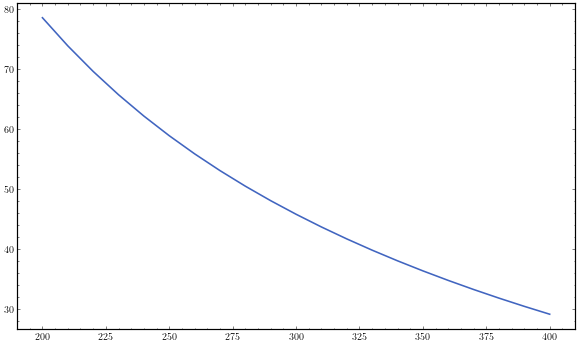

In [91]:
plt.figure(figsize=(10,6))
plt.plot(energies[np.where(energies>=200)], CROSS_TOT[np.where(energies>=200)])
plt.show()

# Raczek et al

## T20 and T22

In [177]:
df_raczek_T20 = pd.read_csv("Deuteron/ExpData/raczek_mishev_T20.csv", header=None, skiprows=2,
                        names=["raczek_X", "raczek_Y", "raczek_errX", "raczek_errY",
                               "mishev_X", "mishev_Y", "mishev_errX", "mishev_errY"])
df_raczek_T20["raczek_err"] = df_raczek_T20["raczek_errY"] - df_raczek_T20["raczek_Y"]
df_raczek_T20["mishev_err"] = df_raczek_T20["mishev_errY"] - df_raczek_T20["mishev_Y"]

df_arenh_T20 = pd.read_csv("Deuteron/ExpData/arenhovel_T20.csv", header=None,
                        names=["energy", "T20"])

df_raczek_T22 = pd.read_csv("Deuteron/ExpData/raczek_mishev_T22.csv", header=None, skiprows=2,
                        names=["raczek_X", "raczek_Y", "raczek_errX", "raczek_errY",
                               "mishev_X", "mishev_Y", "mishev_errX", "mishev_errY"])
df_raczek_T22["raczek_err"] = df_raczek_T22["raczek_errY"] - df_raczek_T22["raczek_Y"]
df_raczek_T22["mishev_err"] = df_raczek_T22["mishev_errY"] - df_raczek_T22["mishev_Y"]

df_arenh_T22 = pd.read_csv("Deuteron/ExpData/arenhovel_T22.csv", header=None,
                        names=["energy", "T22"])

In [185]:
df_tmp = df[(df.FORCE == "N4LO+") &
                (df.CUTOFF == 450) &
                (df.angle == 88) &
                (df.WAVE == "SIEGERT")]
df_tmp = df_tmp.sort_values("Energy")

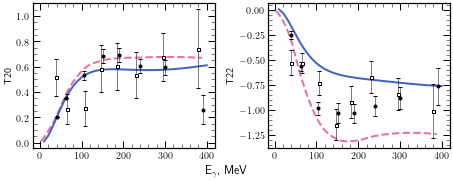

In [197]:
fig, ax = plt.subplots(1,2, figsize=(6.5, 2.8))
fig.supxlabel("E$_\gamma$, MeV", y=0.08, size=12)

ax[0].plot(df_tmp.Energy, df_tmp.T20D2, label="N4LO+", zorder=2, lw=2)
ax[0].plot(df_arenh_T20.energy, df_arenh_T20.T20, label="arenhovel", ls="dashed", zorder=1, lw=2)
ax[0].errorbar(df_raczek_T20.raczek_X, df_raczek_T20.raczek_Y, yerr=df_raczek_T20.raczek_err,
            fmt=f"{markers[0]}k",
                    markersize=3, markeredgecolor="k",
                   elinewidth=0.5, capsize=2, zorder=3, label="Rachek et al")
ax[0].errorbar(df_raczek_T20.mishev_X, df_raczek_T20.mishev_Y, yerr=df_raczek_T20.mishev_err,
            fmt=f"{markers[1]}k",
                    markersize=3, markerfacecolor="white", markeredgecolor="k",
                   elinewidth=0.5, capsize=2, zorder=3, label="Mishev et al")
# ax[0].legend(fontsize=6)
ax[0].tick_params(which='minor', direction='in', length=4, width=0.5, top=True, right=True)
ax[0].tick_params(which='major', direction='in', length=7, width=1, top=True, right=True)
ax[0].set_ylabel("T20")

ax[1].plot(df_tmp.Energy, df_tmp.T22D2, label="N4LO+", zorder=2, lw=2)
ax[1].plot(df_arenh_T22.energy, df_arenh_T22.T22, label="arenhovel", ls="dashed", zorder=1, lw=2)
ax[1].errorbar(df_raczek_T22.raczek_X, df_raczek_T22.raczek_Y, yerr=df_raczek_T22.raczek_err,
            fmt=f"{markers[0]}k",
                    markersize=3, markeredgecolor="k",
                   elinewidth=0.5, capsize=2, zorder=3, label="Rachek et al")
ax[1].errorbar(df_raczek_T22.mishev_X, df_raczek_T22.mishev_Y, yerr=df_raczek_T22.mishev_err,
            fmt=f"{markers[1]}k",
                    markersize=3, markerfacecolor="white", markeredgecolor="k",
                   elinewidth=0.5, capsize=2, zorder=3, label="Mishev et al")
# ax[1].legend(fontsize=6)
ax[1].tick_params(which='minor', direction='in', length=4, width=0.5, top=True, right=True)
ax[1].tick_params(which='major', direction='in', length=7, width=1, top=True, right=True)
ax[1].set_ylabel("T22", x=20)
# plt.ylabel(

fig.tight_layout()
plt.savefig(f"Figures_python/T20_T22_vs_en.pdf", dpi=600, facecolor="white")
plt.show()

## Angular distribution

In [249]:
df_raczek_T20 = pd.read_csv("Deuteron/ExpData/raczek_angular_T20_E25-45.csv", header=None, skiprows=2,
                        names=["raczek_X", "raczek_Y", "raczek_errX", "raczek_errY"])
df_raczek_T20["raczek_err"] = df_raczek_T20["raczek_errY"] - df_raczek_T20["raczek_Y"]

df_raczek_T21 = pd.read_csv("Deuteron/ExpData/raczek_angular_T21_E25-45.csv", header=None, skiprows=2,
                        names=["raczek_X", "raczek_Y", "raczek_errX", "raczek_errY"])
df_raczek_T21["raczek_err"] = df_raczek_T21["raczek_errY"] - df_raczek_T21["raczek_Y"]

df_raczek_T22 = pd.read_csv("Deuteron/ExpData/raczek_angular_T22_E25-45.csv", header=None, skiprows=2,
                        names=["raczek_X", "raczek_Y", "raczek_errX", "raczek_errY"])
df_raczek_T22["raczek_err"] = df_raczek_T22["raczek_errY"] - df_raczek_T22["raczek_Y"]

In [232]:
df_tmp = df[(df.FORCE == "N4LO+") &
                    (df.CUTOFF == 450) &
                    (df.Energy >=25) &
                    (df.Energy <= 45) &
                    (df.WAVE == "SIEGERT")]

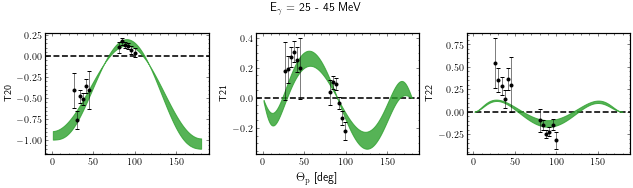

In [258]:
fig, ax = plt.subplots(1,3, figsize=(9, 2.8))
fig.suptitle("E$_\gamma$ = 25 - 45 MeV")
fig.supxlabel("$\Theta_\mathrm{p}$ [deg]", y=0.08, size=12)
# fig.supylabel(ylabel, x=0.03, y=0.6, size=12)

df_gr = df_tmp.groupby("angle")["T20D2"].agg(['min', 'max']).reset_index()
ax[0].fill_between(df_gr.angle, y1=df_gr["min"], y2=df_gr["max"], color="tab:green", zorder=2, alpha=0.8)
ax[0].errorbar(df_raczek_T20.raczek_X, df_raczek_T20.raczek_Y, yerr=df_raczek_T20.raczek_err,
            fmt=f"{markers[0]}k",
                    markersize=3, markeredgecolor="k",
                   elinewidth=0.5, capsize=2, zorder=3, label="Rachek et al")
ax[0].axhline(c="k", ls="dashed", zorder=1)
ax[0].set_ylabel("T20")

df_gr = df_tmp.groupby("angle")["T21D2"].agg(['min', 'max']).reset_index()
ax[1].fill_between(df_gr.angle, y1=df_gr["min"], y2=df_gr["max"], color="tab:green", zorder=2, alpha=0.8)
ax[1].errorbar(df_raczek_T21.raczek_X, df_raczek_T21.raczek_Y, yerr=df_raczek_T21.raczek_err,
            fmt=f"{markers[0]}k",
                    markersize=3, markeredgecolor="k",
                   elinewidth=0.5, capsize=2, zorder=3, label="Rachek et al")
ax[1].axhline(c="k", ls="dashed", zorder=1)
ax[1].set_ylabel("T21")

df_gr = df_tmp.groupby("angle")["T22D2"].agg(['min', 'max']).reset_index()
ax[2].fill_between(df_gr.angle, y1=df_gr["min"], y2=df_gr["max"], color="tab:green", zorder=2, alpha=0.8)
ax[2].errorbar(df_raczek_T22.raczek_X, df_raczek_T22.raczek_Y, yerr=df_raczek_T22.raczek_err,
            fmt=f"{markers[0]}k",
                    markersize=3, markeredgecolor="k",
                   elinewidth=0.5, capsize=2, zorder=3, label="Rachek et al")
ax[2].axhline(c="k", ls="dashed", zorder=1)
ax[2].set_ylabel("T22")
fig.tight_layout()

plt.savefig(f"Figures_python/Tensor_analyzing_power_angular_E25-45.pdf", dpi=600, facecolor="white")
plt.show()